In [1]:
import data
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
startdate = "2020-04-01"
variables = ["deaths", "cases"]
states = ["Massachusetts", "New York"]
df = data.read_data(startdate, states, variables)


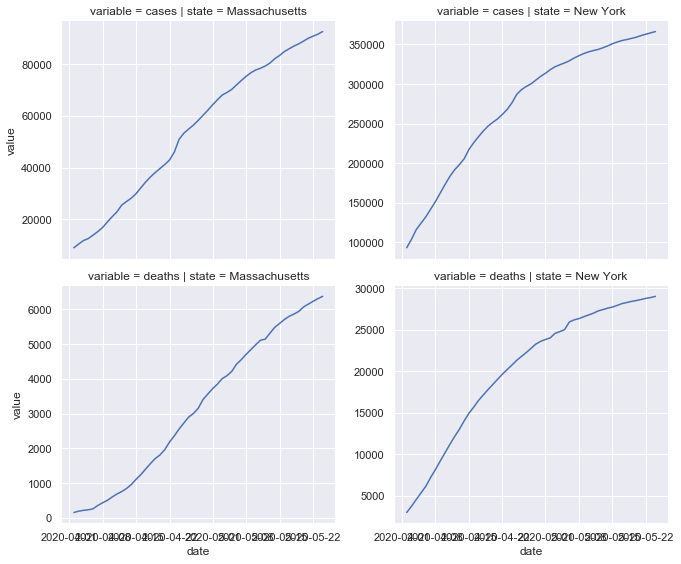

In [10]:
plt.style.use('seaborn-darkgrid')
sns.set()
g = sns.FacetGrid(df, col='state', row='variable', sharex=True, sharey=False, height=4, aspect=1.2)
g = g.map(plt.plot, "date", "value")

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
def read_cdc_data1(start_date, states):
    dt = (pd.read_csv("https://data.cdc.gov/api/views/xkkf-xrst/rows.csv?accessType=DOWNLOAD&bom=true&format=true",
                      na_values=['(NA)', ''], thousands=',', parse_dates=['Week Ending Date']).fillna(0)
          .query("Outcome == 'All causes'")
          .query("Type == 'Predicted (weighted)'")
          .rename(columns={'Excess Lower Estimate': 'excessl', 'Excess Higher Estimate': "excessh", 'Week Ending Date': 'date', 'State': 'state'})
          .query("date > '" + start_date + "'")
          .query("state in @states")
          .set_index('date', drop=True)
         .pivot(columns='state', values=['excessl', 'excessh'])
           .resample('D')
           .interpolate(method='cubic')
          .stack(level=1)
        #   .reset_index(level=1)
        #   .reset_index('date')
        #   .melt(id_vars=['date', 'state'])
          )
    return dt

startdate = "2020-04-01"
variables = ["deaths", "cases"]
states = ["Massachusetts", "New York"]
c = read_cdc_data1(startdate, states)


In [12]:
a.head()

excessl                    excessh             
state      Massachusetts     New York Massachusetts     New York
date                                                            
2020-04-04    286.000000  1508.000000    366.000000  1630.000000
2020-04-05    339.396890  1735.920700    418.765598  1857.802915
2020-04-06    401.028183  1934.075802    480.239067  2055.778426
2020-04-07    469.331001  2103.569096    548.785423  2225.033819
2020-04-08    542.742468  2245.504373    622.769679  2366.676385

In [13]:
b.head()

excessl      excessh
date       state                                  
2020-04-04 Massachusetts   286.000000   366.000000
           New York       1508.000000  1630.000000
2020-04-05 Massachusetts   339.396890   418.765598
           New York       1735.920700  1857.802915
2020-04-06 Massachusetts   401.028183   480.239067